In [88]:

import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
import seaborn as sns





<a id="1"> </a> <br>

# Insert Data


In [89]:
data = pd.read_csv("predictive_maintenance (1).csv")

<a id="2"> </a> <br>

# Examine Data


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


* We have 10 collumns and 10000 rows.
* 4 of this collumns are int. 3 of them are object(string). And 3 of them are float.
* Also we don't have any null values.

In [91]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


**What is the meaning of our collumns?**

* UID: unique identifier ranging from 1 to 10000
* productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
* air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
* process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
* torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
* tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.


In [92]:

data["Failure Type"].unique()
# fail=list(fail)
# for i in range(len(fail)):
#   di[fail[i]]=i
# fail



array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In this notebook we will not try to predict failure type so we can drop this collumn.

And also we don't need UDI collumn so we drop it too.

In [93]:
data.drop(["Target", "UDI", "Product ID"], axis=1, inplace=True)

In [94]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


As we can see we dropped Falure Type, UDI and Product ID.

<a id="3"> </a> <br>

# Visualisation

In fact we don't need visualisation for this task but in this kernel I want to examine this data better.

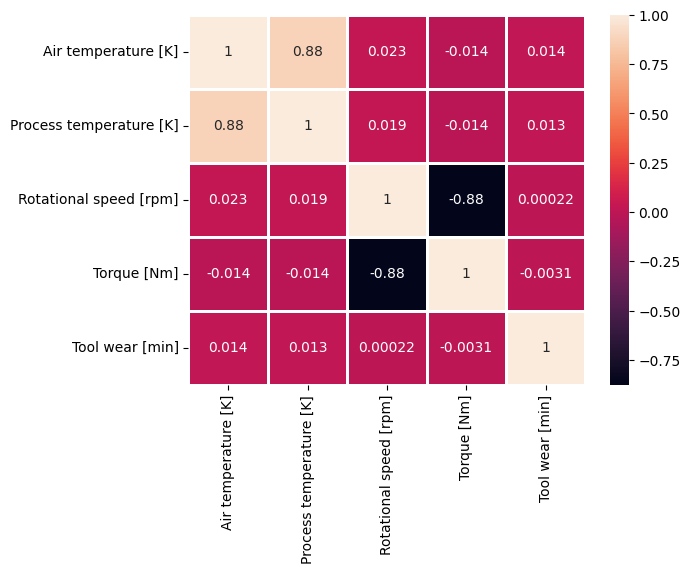

In [95]:
sns.heatmap(data.corr(numeric_only=True), annot=True,linewidths=2)
plt.show()

In [96]:
df=data.columns
df.drop('Failure Type')

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

We can see air temparature and process temparature are correleated. But nothing else correleated.

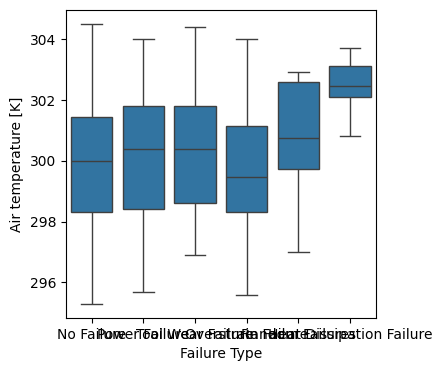

In [97]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Air temperature [K]"],)
plt.show()

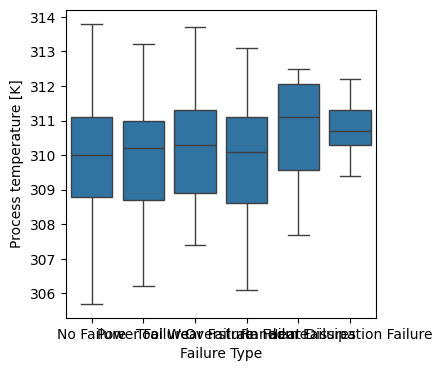

In [98]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Process temperature [K]"],)
plt.show()

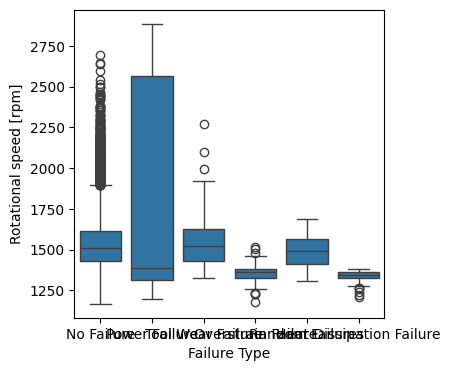

In [99]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Rotational speed [rpm]"],)
plt.show()

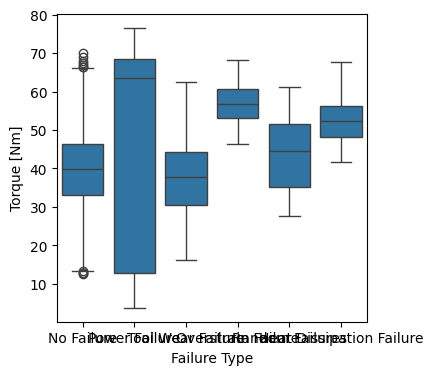

In [100]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Torque [Nm]"],)
plt.show()

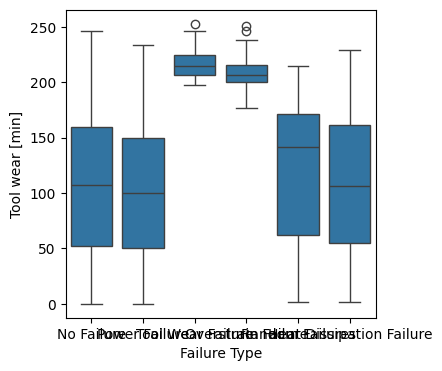

In [101]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Tool wear [min]"],)

plt.show()

<a id="4"> </a> <br>

# Machine Learning

As I said in the introduction we will use Logistic Regression in this notebook.

We imported our libraries.

In [102]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd
import re

failure_type_mapping = {
    0: 'Heat Disspation',
    1: 'No Failure',
    2: 'OverStrain Failure',
    3: 'Power Failure',
    4: 'Random Failure',
    5: 'Tool Wear Failure'
}

# Replace numeric codes with descriptive labels in the dataset
data['Failure Type'] = data['Failure Type'].replace(failure_type_mapping)

# Encode the 'Failure Type' column (target variable)
label_encoder = LabelEncoder()

data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])









# Define input features and output (target)
X = data[['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Failure Type']

# Define a function to clean column names
def clean_col_name(col_name):
    return re.sub(r"\[|\]|<", "", col_name)

# Apply the cleaning function to the columns of X
X.columns = [clean_col_name(col) for col in X.columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss')


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

# Decode the predicted values back to failure types
y_pred_labels = label_encoder.inverse_transform(y_pred)

accuracy, y_pred_labels[:5]  # Show accuracy and first few predictions


(0.982,
 array(['No Failure', 'No Failure', 'No Failure', 'No Failure',
        'No Failure'], dtype=object))

In [104]:
# Print the mapping of encoded labels to original labels
dt=[]
dic={}
for i, label in enumerate(label_encoder.classes_):
    print(f"{i+1}: {label}")
    dic[label]=i+1
    dt.append(label)



1: Heat Dissipation Failure
2: No Failure
3: Overstrain Failure
4: Power Failure
5: Random Failures
6: Tool Wear Failure


In [105]:
dic

{'Heat Dissipation Failure': 1,
 'No Failure': 2,
 'Overstrain Failure': 3,
 'Power Failure': 4,
 'Random Failures': 5,
 'Tool Wear Failure': 6}

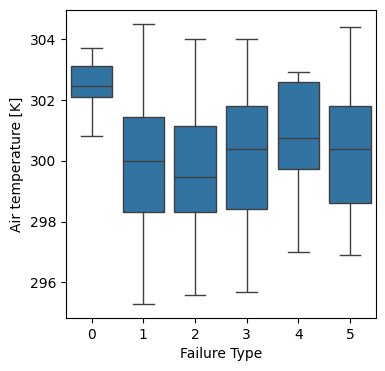

In [106]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Air temperature [K]"],)
plt.show()

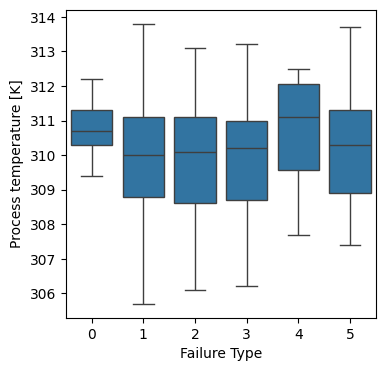

In [107]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Process temperature [K]"],)
plt.show()

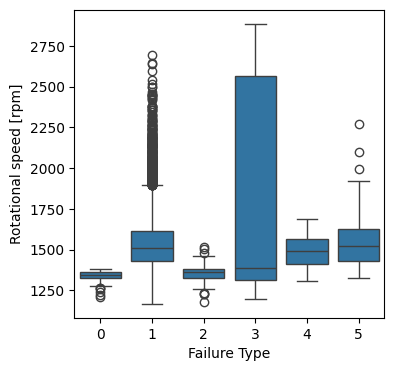

In [108]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Rotational speed [rpm]"],)
plt.show()

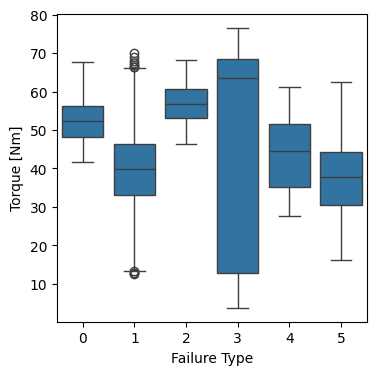

In [109]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Torque [Nm]"],)
plt.show()

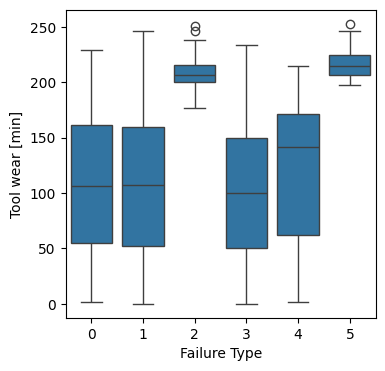

In [110]:
plt.figure(figsize=(4,4))
sns.boxplot(x=data["Failure Type"], y=data["Tool wear [min]"],)

plt.show()



The boxplots show the distribution of "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", and "Tool wear [min]" for each failure type.  Here's a breakdown of how to analyze them:

* **Median:** The line inside each box represents the median (or the 50th percentile) of the temperature or other variable for that particular failure type.  Compare the medians across different failure types.  Are they significantly different?

* **Interquartile Range (IQR):** The box itself represents the interquartile range, which spans from the 25th percentile (first quartile) to the 75th percentile (third quartile).  A wider box suggests more variability or spread in the data for that failure type.

* **Whiskers:** The lines extending from the box are the whiskers, which typically represent 1.5 times the IQR below the first quartile and above the third quartile. Data points outside of the whiskers are considered outliers and are plotted individually. Look for outliers as they might indicate unusual data points.

* **Outliers:** Individual points beyond the whiskers are outliers.  These could be errors in data or legitimate extreme values. Consider whether these outliers are significant.

**Comparison across Failure Types:**

The key is to compare the boxplots for different failure types to see if there are statistically significant differences in the distribution of each variable.

* **Overlapping Boxes:** If the boxes for different failure types substantially overlap, it suggests that the variable may not be a strong discriminator between those failure types.

* **Non-overlapping Boxes:** If the boxes for different failure types are well-separated, with different medians and IQRs, the variable may be a good predictor of the failure type.

**Example: "Tool wear [min]"**

The boxplot for "Tool wear [min]" likely shows an increasing trend in median tool wear as you move from one failure type to another. This suggests a relationship between tool wear and the type of failure.  High values of tool wear might correlate with a specific failure type, but the extent to which the boxes overlap needs to be analyzed.

**In summary:** Carefully observe the median, IQR, whiskers, and outliers for each variable across different failure types. Look for differences in central tendency (median) and spread (IQR).  Significant differences suggest a variable may be useful in predicting the failure type. Overlap in the distributions suggests weaker discriminatory power.


In [111]:
# Create a mapping of encoded values to their respective labels
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Predict for the given input
_input = [[298.8, 308.9, 1455.0, 71.3, 208.0]]
_pred = model.predict(_input)

# Get the numeric prediction
print(f"Numeric Prediction: {_pred}")

# Get the corresponding failure type using the mapping
failure_type = label_mapping[_pred[0]]
print(f"Predicted Failure Type: {failure_type}")


Numeric Prediction: [3]
Predicted Failure Type: Power Failure


In [112]:
# Create a mapping of numeric values to labels
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(f"Label Mapping: {label_mapping}")  # Optional: To check if the mapping is correct

# Predict for the given input
_input = [[302.6, 311.6,1227 ,68.2 , 187]]
_pred = model.predict(_input)

# Print the numeric prediction
print(f"Numeric Prediction: {_pred}")

# Get the descriptive label using the mapping
failure_type = label_mapping.get(_pred[0], "Unknown Failure Type")  # Safeguard with default message
print(f"Predicted Failure Type: {failure_type}")


Label Mapping: {0: 'Heat Dissipation Failure', 1: 'No Failure', 2: 'Overstrain Failure', 3: 'Power Failure', 4: 'Random Failures', 5: 'Tool Wear Failure'}
Numeric Prediction: [2]
Predicted Failure Type: Overstrain Failure


In [113]:
print(data['Failure Type'].unique())



[1 3 5 2 4 0]


In [114]:
df=['Air temperature [K]',	'Process temperature [K]',	'Rotational speed [rpm]',	'Torque [Nm]'	,'Tool wear [min]']

print(df)

['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.99      1.00      0.99      1935
           2       0.70      0.54      0.61        13
           3       0.82      0.70      0.76        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.57      0.53      0.55      2000
weighted avg       0.97      0.98      0.98      2000



C:\Users\vakad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vakad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vakad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

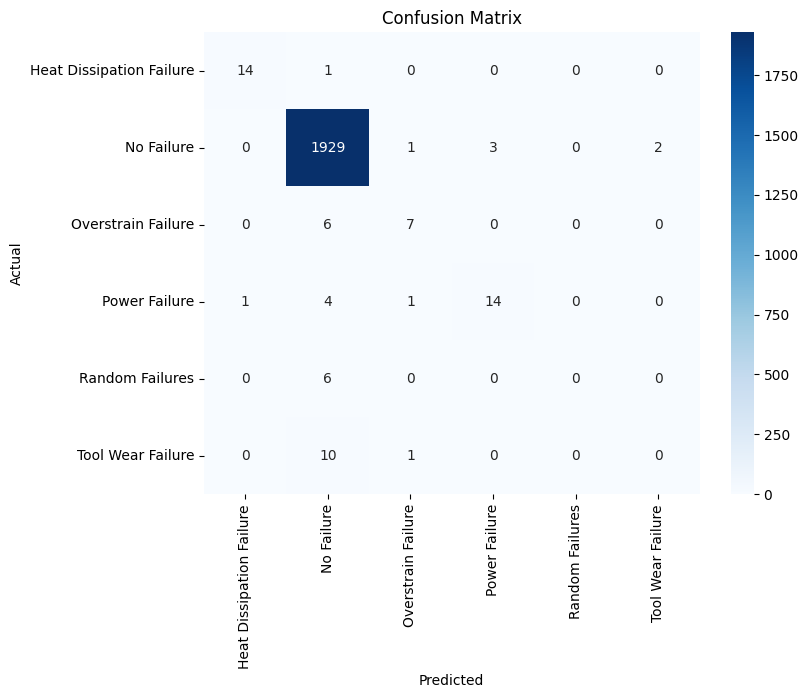

In [115]:


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import re





accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [116]:
import pickle

In [117]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [118]:
import os
# print(os.listdir())

print(os.getcwd())  # Prints the current working directory


c:\Users\vakad\python_1\ml_website


In [119]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])

# Save the LabelEncoder for later decoding
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
